In [ ]:
# import os
# import sys
# if not 'Informer2020' in sys.path:
#     sys.path += ['Informer2020']

# from utils.tools import dotdict
# from exp.exp_informer import Exp_Informer
# import torch

# from torch.utils.data import DataLoader
# from data.data_loader import Dataset_Pred
# from torch.utils.data import DataLoader
# import pandas as pd
# import numpy as np
# import yfinance as yf
# import requests
# import json
# import time

In [ ]:
# ROOT_DIR = './dataset/'
# data_path = 'AAPL_reduced_no_date.csv'
# target_column = 'close'

# # Note to check
# #freq

In [ ]:
# # p = pd.read_csv("./dataset/AAPL_reduced.csv")
# # p = p.drop(columns=["date"])
# # p.to_csv("./dataset/AAPL_reduced_no_date.csv", index=False)
# p = pd.read_csv("./dataset/AAPL_reduced_no_date.csv")
# p

In [ ]:
# p['time_id'] = range(0, p.shape[0])
# p

In [ ]:
# p.to_csv("./dataset/AAPL_reduced_time_id.csv", index=False)

In [ ]:
# args = dotdict()

# args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

# args.data = 'custom' # data
# args.root_path =  ROOT_DIR#'/content/' # root path of data file
# args.data_path = data_path#'output.csv' # data file
# args.features = 'MS' # forecasting task, options:[M, S, MS];
#                     #M:multivariate predict multivariate, S:univariate predict univariate,
#                     #MS:multivariate predict univariate
# args.target = target_column # target feature in S or MS task
# args.freq = '1m' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
# args.checkpoints = './informer_checkpoints' # location of model checkpoints

# args.seq_len = 96 # input sequence length of Informer encoder
# args.label_len = 48 # start token length of Informer decoder
# args.pred_len = 84 # prediction sequence length
# # Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

# args.enc_in = 8 # encoder input size
# args.dec_in = 8 # decoder input size
# args.c_out = 8 # output size
# args.factor = 5 # probsparse attn factor
# args.d_model = 512 # dimension of model
# args.n_heads = 8 # num of heads
# args.e_layers = 2 # num of encoder layers
# args.d_layers = 1 # num of decoder layers
# args.d_ff = 2048 # dimension of fcn in model
# args.dropout = 0.05 # dropout
# args.attn = 'prob' # attention used in encoder, options:[prob, full]
# args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
# args.activation = 'gelu' # activation
# args.distil = True # whether to use distilling in encoder
# args.output_attention = False # whether to output attention in ecoder
# args.mix = True
# args.padding = 0
# args.freq = 'h'

# args.batch_size = 32
# args.learning_rate = 0.0001
# args.loss = 'mse'
# args.lradj = 'type1'
# args.use_amp = False # whether to use automatic mixed precision training

# args.num_workers = 0
# args.itr = 1
# args.train_epochs = 2
# args.patience = 3
# args.des = 'exp'

# args.use_gpu = True if torch.cuda.is_available() else False
# args.gpu = 0

# args.use_multi_gpu = False
# args.devices = '0,1,2,3'

In [ ]:
# args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

# if args.use_gpu and args.use_multi_gpu:
#     args.devices = args.devices.replace(' ','')
#     device_ids = args.devices.split(',')
#     args.device_ids = [int(id_) for id_ in device_ids]
#     args.gpu = args.device_ids[0]

In [ ]:
# args.data

In [ ]:
# # Set augments by using data name
# data_parser = {
#     'custom':{'data':data_path,'T':target_column,'M':[6,6,6],'S':[1,1,1],'MS':[5,5,1]}, #Change the array here based on the number of features
# }
# if args.data in data_parser.keys():
#     data_info = data_parser[args.data]
#     args.data_path = data_info['data']
#     args.target = data_info['T']
#     args.enc_in, args.dec_in, args.c_out = data_info[args.features]

# args.detail_freq = args.freq
# args.freq = args.freq[-1:]

# Exp = Exp_Informer
# print('Args in experiment:')
# print(args)

In [ ]:
# for ii in range(args.itr):
#     # setting record of experiments
#     setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features,
#                 args.seq_len, args.label_len, args.pred_len,
#                 args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

#     # set experiments
#     exp = Exp(args)

#     # train
#     print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
#     exp.train(setting)

#     # test
#     print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
#     exp.test(setting)

#     torch.cuda.empty_cache()

In [ ]:
# # set saved model path
# setting = 'informer_custom_ftMS_sl96_ll48_pl84_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'
# # path = os.path.join(args.checkpoints,setting,'checkpoint.pth')


# # If you already have a trained model, you can set the arguments and model path, then initialize a Experiment and use it to predict
# # Prediction is a sequence which is adjacent to the last date of the data, and does not exist in the data
# # If you want to get more information about prediction, you can refer to code `exp/exp_informer.py function predict()` and `data/data_loader.py class Dataset_Pred`

# exp = Exp(args)

# exp.predict(setting, True)

# prediction = np.load('./results/'+setting+'/real_prediction.npy')

# prediction.shape

# Data = Dataset_Pred
# timeenc = 0 if args.embed!='timeF' else 1
# flag = 'pred'; shuffle_flag = False; drop_last = False; batch_size = 1

# freq = args.detail_freq

# data_set = Data(
#     root_path=args.root_path,
#     data_path=args.data_path,
#     flag=flag,
#     size=[args.seq_len, args.label_len, args.pred_len],
#     features=args.features,
#     target=args.target,
#     timeenc=timeenc,
#     freq=freq
# )
# data_loader = DataLoader(
#     data_set,
#     batch_size=batch_size,
#     shuffle=shuffle_flag,
#     num_workers=args.num_workers,
#     drop_last=drop_last)

# len(data_set), len(data_loader)

In [ ]:
# # When we finished exp.train(setting) and exp.test(setting), we will get a trained model and the results of test experiment
# # The results of test experiment will be saved in ./results/{setting}/pred.npy (prediction of test dataset) and ./results/{setting}/true.npy (groundtruth of test dataset)

# preds = np.load('./results/'+setting+'/pred.npy')
# trues = np.load('./results/'+setting+'/true.npy')

# # [samples, pred_len, dimensions]
# preds.shape, trues.shape

In [ ]:
# import matplotlib.pyplot as plt

# def plot_predictions(trues, preds, start_index, step, num_plots):
#     num_rows = num_plots // 3
#     num_cols = 3

#     fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 3 * num_rows), sharex=True, sharey=True)

#     for i, ax in enumerate(axes.flatten()):
#         if i < num_plots:
#             index = start_index + i * step

#             ax.plot(trues[index, :, -1], label='GroundTruth')
#             ax.plot(preds[index, :, -1], label='Prediction')

#             ax.set_title(f'Index {index}')
#             ax.legend()
#             ax.set_xlabel('time (h)')
#             ax.set_ylabel('Close Price')
#             ax.tick_params(axis='both', which='both', labelsize=8, direction='in')

#         else:
#             ax.axis('off')


#     plt.tight_layout()
#     plt.show()

In [ ]:
# plot_predictions(trues, preds, start_index=0, step=50, num_plots=9)

In [62]:
# import os

# search_dir = "./informer_checkpoints/"
# dirs = os.listdir(search_dir)
# dir_list = []
# for d in dirs:
#     date_change = os.path.getmtime(search_dir + d)
#     dir_list.append({'directory_name': d, 'changed_date': date_change})

# sorted(dir_list, key=lambda x: x['changed_date'], reverse=True)[0]['directory_name']


In [ ]:
# import numpy as np
# p = np.arange(12)
# q = p.reshape(2,2,3)
# print('p', p)
# print('q ', q)
# print(q.shape)

In [ ]:
# import csv
# import numpy as np
# fil_name = 'file'
# example = np.zeros((2,3,4))
# print('example shape ', example.shape)
# example = example.tolist()
# with open(fil_name+'.csv', 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile, delimiter=',')
#     writer.writerows(example)

# #to read file you saved
# with open(fil_name+'.csv', 'r') as f:
#   reader = csv.reader(f)
#   examples = list(reader)

# print(examples)
# nwexamples = []
# for row in examples:
#     nwrow = []
#     for r in row:
#         nwrow.append(eval(r))
#     nwexamples.append(nwrow)
# print(nwexamples)
# nwa = np.array(nwexamples)
# print('newexamples shape ', nwa.shape)

In [ ]:
# import pandas as pd
# data = []
# def get_new_data(time_id,id, x1, x2, x3, y):
#     return {'time_id':time_id,'stock_id':id,'x1':x1,'x2':x2,'x3':x3, 'y': y}

# data.append(get_new_data(1,'a', 'a1x1', 'a1x2', 'a1x3', 'a1y1'))
# data.append(get_new_data(1,'b', 'b1x1', 'b1x2', 'b1x3', 'b1y1'))
# # data.append(get_new_data(1,'c', 'c1x1', 'c1x2', 'c1x3', 'c1y1'))
# data.append(get_new_data(2,'a', 'a2x1', 'a2x2', 'a2x3', 'a2y2'))
# data.append(get_new_data(2,'b', 'b2x1', 'b2x2', 'b2x3', 'b2y2'))
# # data.append(get_new_data(2,'c', 'c2x1', 'c2x2', 'c2x3', 'c2y1'))
# data.append(get_new_data(3,'a', 'a3x1', 'a3x2', 'a3x3', 'a3y3'))
# data.append(get_new_data(3,'b', 'b3x1', 'b3x2', 'b3x3', 'b3y3'))
# # data.append(get_new_data(3,'c', 'c3x1', 'c3x2', 'c3x3', 'c3y1'))


# # data.append(get_new_data(1,'a', 1, 1, 1, 2))
# # data.append(get_new_data(1,'b', 3, 3, 3, 4))
# # data.append(get_new_data(2,'a', 5, 5, 5, 6))
# # data.append(get_new_data(2,'b', 7, 7, 7, 8))
# # data.append(get_new_data(3,'a', 9, 9, 9, 10))
# # data.append(get_new_data(3,'b', 11, 11, 11, 12))

# data_df = pd.DataFrame(data)
# data_df


In [ ]:


# data.append(get_new_data(1,'a', 'a1x1', 'a1x2', 'a1x3', 'a1y1'))
# data.append(get_new_data(1,'b', 'b1x1', 'b1x2', 'b1x3', 'b1y1'))
# data.append(get_new_data(2,'a', 'a2x1', 'a2x2', 'a2x3', 'a2y2'))
# data.append(get_new_data(2,'b', 'b2x1', 'b2x2', 'b2x3', 'b2y2'))
# data.append(get_new_data(3,'a', 'a3x1', 'a3x2', 'a3x3', 'a3y3'))
# data.append(get_new_data(3,'b', 'b3x1', 'b3x2', 'b3x3', 'b3y3'))

# data_df = pd.DataFrame(data)
# display(data_df)

# sample_3d = create_3d_stock_data(data_df)
# print('sample_3d shape ', sample_3d.shape)

# # single record contains record for one time id
# # first_record = sample_3d[0]
# # print('first_record ', first_record)

# # first_stock_record = first_record[0]
# # print('first_stock_record ', first_stock_record)

# # target_data = first_stock_record[-1]
# # print('target_data ', target_data)

# print('Batch record')
# # batch record, suppose 2 time id
# batch_record = sample_3d[0:2]
# print('batch_record ', batch_record)

# features = batch_record[:,:,0:-1]
# print('\nfeatures ', features)
# targets = batch_record[:,:,-1]
# print('\ntargets ', targets)

# stock(num_stock), time_id(window_len), features (num_features)
# inputs: [batch - splits the time_id, num_stock, window_len, num_features]

In [ ]:
# all_all_data = []
# batch_size = 2
# row_start = 0
# num_of_iterations = len(sample_3d) / batch_size
# for i in range(num_of_iterations)
# batch_record = sample_3d[0:2]

In [ ]:
# all_stock_df

In [ ]:
# type(stock_4d)

In [ ]:
# stock_4d[0]

In [63]:
import os
import sys
if not 'Informer2020' in sys.path:
    sys.path += ['Informer2020']

from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

from torch.utils.data import DataLoader
from data.data_loader import Dataset_Pred
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import yfinance as yf
import requests
import json
import time
import shutil

def remove_directory(dir_path):
    if os.path.exists(dir_path):
        print('removing directory ', dir_path)
        shutil.rmtree(dir_path)

def run_volatility(data_path, target_column, target_config_list_m, forecasting_task, target_config_list_ms):
    
    remove_directory('./informer_checkpoints/')
    remove_directory('./results/')
    args = dotdict()

    ROOT_DIR = './dataset/'
    args.is_time_id = True
    data_path = data_path
   
    target_column = target_column

    args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

    args.data = 'custom' # data
    args.root_path =  ROOT_DIR#'/content/' # root path of data file
    args.data_path = data_path#'output.csv' # data file
    args.features = forecasting_task # forecasting task, options:[M, S, MS];
                        #M:multivariate predict multivariate, S:univariate predict univariate,
                        #MS:multivariate predict univariate
    args.target = target_column # target feature in S or MS task
    args.freq = '1m' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
    args.checkpoints = './informer_checkpoints' # location of model checkpoints

    args.seq_len = 96 # input sequence length of Informer encoder
    args.label_len = 48 # start token length of Informer decoder
    args.pred_len = 84 # prediction sequence length
    # Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

    args.enc_in = 8 # encoder input size
    args.dec_in = 8 # decoder input size
    args.c_out = 8 # output size
    args.factor = 5 # probsparse attn factor
    args.d_model = 512 # dimension of model
    args.n_heads = 8 # num of heads
    args.e_layers = 2 # num of encoder layers
    args.d_layers = 1 # num of decoder layers
    args.d_ff = 2048 # dimension of fcn in model
    args.dropout = 0.05 # dropout
    args.attn = 'prob' # attention used in encoder, options:[prob, full]
    args.embed = 'fixed' # time features encoding, options:[timeF, fixed, learned]
    args.activation = 'gelu' # activation
    args.distil = True # whether to use distilling in encoder
    args.output_attention = False # whether to output attention in ecoder
    args.mix = True
    args.padding = 0
    args.freq = 'h'

    args.batch_size = 32
    args.learning_rate = 0.0001
    args.loss = 'mse'
    args.lradj = 'type1'
    args.use_amp = False # whether to use automatic mixed precision training

    args.num_workers = 0
    args.itr = 1
    args.train_epochs = 2
    args.patience = 3
    args.des = 'exp'

    args.use_gpu = True if torch.cuda.is_available() else False
    args.gpu = 0

    args.use_multi_gpu = False
    args.devices = '0,1,2,3'

    args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

    if args.use_gpu and args.use_multi_gpu:
        args.devices = args.devices.replace(' ','')
        device_ids = args.devices.split(',')
        args.device_ids = [int(id_) for id_ in device_ids]
        args.gpu = args.device_ids[0]

    # Set augments by using data name
    data_parser = {
        'custom':{'data':data_path,
                'T':target_column,
                #   'M':[2,2,2],
                # 'M':[4,4,4],
                'M': target_config_list_m,
                #   'M':[5,5,5],
                'S':[1,1,1],
                'MS':target_config_list_ms}, #Change the array here based on the number of features
    }
    if args.data in data_parser.keys():
        data_info = data_parser[args.data]
        args.data_path = data_info['data']
        args.target = data_info['T']
        args.enc_in, args.dec_in, args.c_out = data_info[args.features]

    args.detail_freq = args.freq
    args.freq = args.freq[-1:]

    Exp = Exp_Informer
    print('Args in experiment:')
    print(args)

    for ii in range(args.itr):
        # setting record of experiments
        setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features,
                    args.seq_len, args.label_len, args.pred_len,
                    args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

        # set experiments
        exp = Exp(args)

        # train
        print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
        exp.train(setting)

        # test
        print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
        exp.test(setting)

        print('Finished training')
        # torch.cuda.empty_cache()

    search_dir = "./informer_checkpoints/"
    dirs = os.listdir(search_dir)
    dir_list = []
    for d in dirs:
        if d.lower() == '.ds_store':
            continue
        date_change = os.path.getmtime(search_dir + d)
        dir_list.append({'directory_name': d, 'changed_date': date_change})

    # sorted(dir_list, key=lambda x: x['changed_date'], reverse=True)[0]['directory_name']

    # set saved model path
    # setting = 'informer_custom_ftMS_sl96_ll48_pl84_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'
    setting = sorted(dir_list, key=lambda x: x['changed_date'], reverse=True)[0]['directory_name']
    print('setting folder ', setting)
    # path = os.path.join(args.checkpoints,setting,'checkpoint.pth')


    # If you already have a trained model, you can set the arguments and model path, then initialize a Experiment and use it to predict
    # Prediction is a sequence which is adjacent to the last date of the data, and does not exist in the data
    # If you want to get more information about prediction, you can refer to code `exp/exp_informer.py function predict()` and `data/data_loader.py class Dataset_Pred`

    exp = Exp(args)

    exp.predict(setting, True)

    prediction = np.load('./results/'+setting+'/real_prediction.npy')

    prediction.shape

    Data = Dataset_Pred
    timeenc = 0 if args.embed!='timeF' else 1
    flag = 'pred'; shuffle_flag = False; drop_last = False; batch_size = 1

    freq = args.detail_freq

    data_set = Data(
        root_path=args.root_path,
        is_time_id=args.is_time_id,
        data_path=args.data_path,
        flag=flag,
        size=[args.seq_len, args.label_len, args.pred_len],
        features=args.features,
        target=args.target,
        timeenc=timeenc,
        freq=freq
    )
    data_loader = DataLoader(
        data_set,
        batch_size=batch_size,
        shuffle=shuffle_flag,
        num_workers=args.num_workers,
        drop_last=drop_last)

    len(data_set), len(data_loader)

    # When we finished exp.train(setting) and exp.test(setting), we will get a trained model and the results of test experiment
    # The results of test experiment will be saved in ./results/{setting}/pred.npy (prediction of test dataset) and ./results/{setting}/true.npy (groundtruth of test dataset)

    preds = np.load('./results/'+setting+'/pred.npy')
    trues = np.load('./results/'+setting+'/true.npy')

    # [samples, pred_len, dimensions]
    preds.shape, trues.shape

    import matplotlib.pyplot as plt

    def plot_predictions(trues, preds, start_index, step, num_plots):
        num_rows = num_plots // 3
        num_cols = 3

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 3 * num_rows), sharex=True, sharey=True)

        for i, ax in enumerate(axes.flatten()):
            if i < num_plots:
                index = start_index + i * step

                ax.plot(trues[index, :, -1], label='GroundTruth')
                ax.plot(preds[index, :, -1], label='Prediction')

                ax.set_title(f'Index {index}')
                ax.legend()
                ax.set_xlabel('time')
                ax.set_ylabel('Realized volatility')
                ax.tick_params(axis='both', which='both', labelsize=8, direction='in')

            else:
                ax.axis('off')


        plt.tight_layout()
        plt.show()

    plot_predictions(trues, preds, start_index=0, step=50, num_plots=6)


removing directory  ./informer_checkpoints/
removing directory  ./results/
Args in experiment:
{'is_time_id': True, 'model': 'informer', 'data': 'custom', 'root_path': './dataset/', 'data_path': 'stock_data_targets.csv', 'features': 'M', 'target': 'stock_0', 'freq': 'h', 'checkpoints': './informer_checkpoints', 'seq_len': 96, 'label_len': 48, 'pred_len': 84, 'enc_in': 2, 'dec_in': 2, 'c_out': 2, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'fixed', 'activation': 'gelu', 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'batch_size': 32, 'learning_rate': 0.0001, 'loss': 'mse', 'lradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 2, 'patience': 3, 'des': 'exp', 'use_gpu': False, 'gpu': 0, 'use_multi_gpu': False, 'devices': '0,1,2,3', 'detail_freq': 'h'}
using mps device
>>>>>>>start training : informer_custom_ftM_sl96_ll48_pl84_dm512_nh8_el2_dl1_df2048_atprob

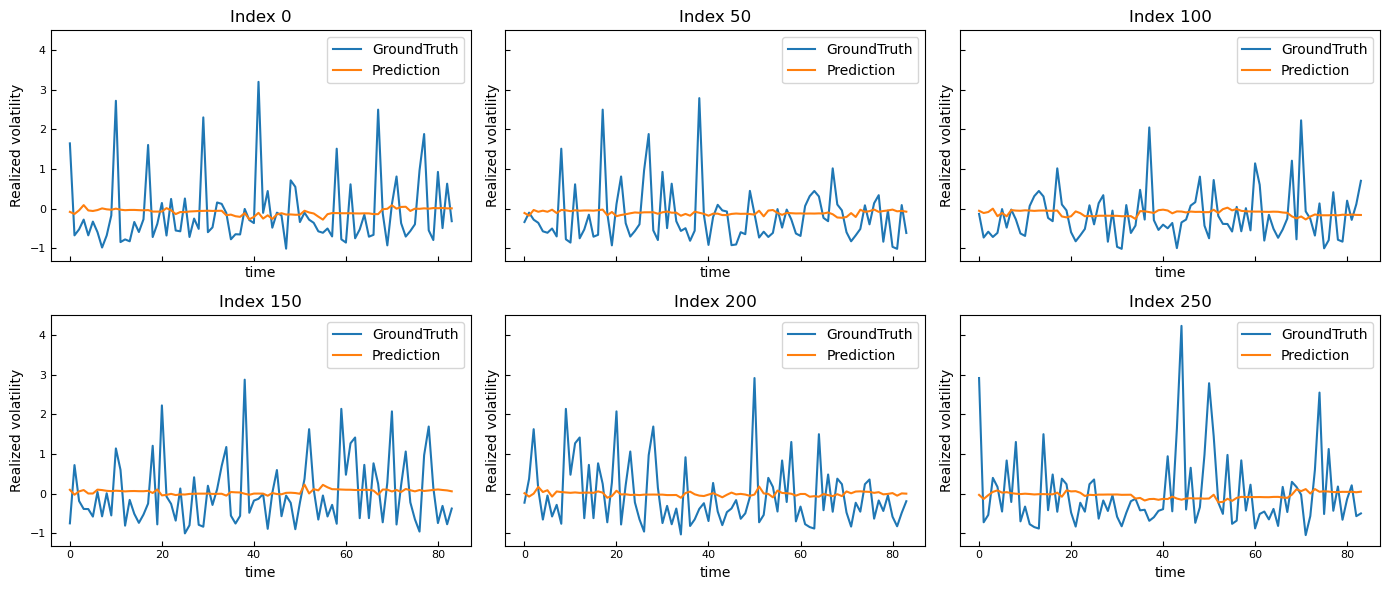

In [64]:
run_volatility('stock_data_targets.csv', 'stock_0', [2,2,2], 'M', [])

In [ ]:
run_volatility('stock_data_tcn_targets.csv', 'stock_0_y', [4,4,4], 'M', [])

In [ ]:
run_volatility('stock_0_features.csv', 'target', [], 'MS', [9,9,1])